In [ ]:
实践4 逻辑判断与分支
学习目标
1.掌握if...else语句
2.掌握逻辑表达式的书写
3.理解万物皆为布尔值
4.掌握选择结构的算法构造


# 逻辑判断与分支

如果源代码是我们写出来的故事，那么“逻辑判断与分支”就是故事中的情节编排，是场景之间的关联、排列和衔接——这一点程序和小说、影视剧不那么相近，倒是更像电子游戏。游戏是互动性最强的艺术形式，可以根据玩家的行为走向不同的情节，发生不同的事件和冲突，这种分支多样性极大地增加了表现力和趣味性。

程序也一样，如果一个程序只能顺序一条一条指令执行，能表达的东西就太少了。我们需要根据输入的不同执行不同的指令，最终给出不一样的结果，这样程序才有价值。所以所有的编程语言都会提供逻辑判断和分支执行的能力。

## 1.if...else 语句

所谓分支，其实也很简单，就是“如果这样就 A 否则就 B”，通过这个句式的组合可以实现无穷无尽的变化，这个句式翻译成 Python 的语法就是：

```python
if X:
    A
else:
    B
```

X 是一个“逻辑判断”，其结果要么是真（*True*）要么是假（*False*）；A 和 B 是两个代码段（*code block*），分别缩进以表示从属于 `if` 和 `else`。上面的代码意思是：如果 X 是真就执行代码段 A，否则就执行代码段 B。

Python 还可以连着写好几个 `if`，比如：

```python
if X:
    A
elif Y:
    B
else:
    C
```

这里的 `elif` 是 *else if* 的简化写法，整个意思是：如果 X 是真就执行 A（不管 Y 如何），否则继续判断 Y——如果 Y 是真就执行 B，否则就执行 C。

下面我们重点看看 X、Y 这些所谓“逻辑判断”可以是什么东西。

##  2.逻辑表达式

只要最终给出一个逻辑真值或假值的东西都可以算作“逻辑判断”，我们大致分分类可以有这么些：
* 布尔类型的变量或者值，要么是 `True` 要么是 `False`；
* 上一章介绍的**大小比较操作符**的运算结果，例如 `a <= 6` `a + b == c` 这类；
* 返回布尔值的函数，例如我们上一章介绍的 `isinstance()`；
* 上面这些东西通过上一章介绍的**逻辑运算操作符**组合起来，例如 `(a > 1) and (a <= 6)` `isinstance(x, int) or isinstance(x, float)`。

这些东西通称“逻辑表达式”，因为其结果最终都是一个逻辑真值或者假值，根据其真假 `if...else` 语句就知道到底应该执行哪一个分支。我们来看例子。

In [ ]:
from random import randrange
n = randrange(1, 100)
if n % 2 == 0:
    print(n, '是偶数')
else:
    print(n, '是奇数')

上面的代码首先引入 `random` 模块里的一个函数 `randrange()`，然后调用这个函数来生成一个 1~100 之间的随机数并赋给 n——我们先不去细究这里面的东西，知道这个结果就好，关键是下面的 `if...else` 语句：如果 n 除以 2 的余数是 0（还记得上一章我们介绍的整除操作符 `//` 和 `%` 吧），就打印 ‘n 是偶数’，否则打印 ‘n 是奇数’。由于 n 是随机生成的一个数，所以你可以反复多次运行上面这段代码（运行的方法是选择上面这个 *cell*，按 ⌃+回车），看看不同的结果。

有了逻辑判断和条件分支，我们可以做好多事情了，比如我们可以实现一个算绝对值的函数：

In [ ]:
def abs(x):
    if x >= 0:
        return x
    else:
        return -x

这个函数非常简单，如果是大于等于零的数就直接返回这个数，否则返回它的相反数，我们可以测试下：

In [ ]:
abs(42)

In [ ]:
abs(-3.14)

我们还可以实现一个我们自己的 `type()` 函数，和官方的 `type()` 功能也差不多，即返回一个变量或者值的数据类型：

In [ ]:
def type_0(x):
    if isinstance(x, bool):
        return 'bool'
    elif isinstance(x, int):
        return 'int'
    elif isinstance(x, float):
        return 'float'
    elif isinstance(x, str):
        return 'str'
    else:
        return 'unknown'

In [ ]:
type_0(42)

In [ ]:
type_0('abracadabra')

In [ ]:
type_0(False)

In [ ]:
type_0([1, 2, 3])

最后一个例子显示出我们的 `type_0` 实现和系统的 `type` 还是有点差距，不过没关系，我们才刚开始嘛。

##  3.万物皆为布尔值

我们上一节列出了几类逻辑表达式，它们都可以放在 `if` 后面做逻辑判断，但可以放在 `if` 后面的远不止这些，事实上**几乎任何东西**都可以。因为 Python 提供了一组规则来判断一个值“相当于”逻辑真还是假，这种定义是在所谓“合理类比”和方便性的基础上做出的，比如：
* 数字 0 “相当于”假，而其他数字都相当于真；
* 空字符串“相当于”假，非空的字符串“相当于”真。

其他很多情形也类似，一般来说 0 啊、空啊之类的都“相当于”假，其他就算真了。如果我们搞不清楚某个东西相当于真还是假，可以借助于内置函数 `bool()`，这个函数可以把任何东西变成布尔值（`True` 或者 `False`），下面是一些例子：

In [ ]:
bool(42)

In [ ]:
bool(0)

In [ ]:
bool(0.0)

In [ ]:
bool('')

In [ ]:
bool('abracadabra')

In [ ]:
bool('0') # 这是一个非空字符串，不要和 bool(0) 搞混哦~

In [ ]:
bool([1, 2, 3]) # 和字符串类似，非空列表相当于真，空列表相当于假

In [ ]:
bool([])

这种“相当于”的逻辑，可以帮助我们写出更简洁的代码，比如下面两段代码是完全等价的：

In [ ]:
a = 42
if n != 0:
    a = a / n

In [ ]:
a = 42
if n:
    a = a / n

下面两段也完全等价：

In [ ]:
s = input('请输入您的姓名')
if s == '':
    print('姓名不可为空，请重新输入')

In [ ]:
s = input('请输入您的姓名')
if not s:
    print('姓名不可为空，请重新输入')

## 案例  求解BMI问题（2）判断BMI指标等级（选择结构）  
计算BMI指数可用于评价身体状况。用于评价身体状况的指标等级分为以下四部分：  
	轻体重：BMI<18.5  
	健康体重：18.5≤BMI<24  
	超重：24≤BMI<28  
	肥胖：28≤BMI  
  

### （1）使用if语句判断指标等级
为了判断BMI指标等级，实际上要做的就是判断变量value的数值最终落入哪一个区间。本任务中一共有四个区间，分别为轻体重、健康体重、超重和肥胖。最容易想到的方法是使用四个if语句。


In [ ]:
#【例1】使用if语句判断指标等级
height = float(input("请输入你的身高(m):"))
weight = float(input("请输入你的体重(kg):"))
value = weight / pow(height, 2)
if value < 18.5:
    print("轻体重")
if 18.5 <= value < 24:
    print("健康体重")
if 24 <= value < 28:
    print("超重")
if 28 <= value:
    print("肥胖")


### （2）使用if-elif-else语句判断指标等级
使用if-elif-else语句则不会做这么多无用的操作。if-elif-else满足了一个条件之后，执行该条件下的语句块，然后跳出该选择结构。如果都不满足，则执行else分支下的语句块。例2使用if-elif-else结构改写了原程序。请读者对照例2-2-1与例2-2-2，比较仅使用if语句和使用if-elif-else结构的差别。

In [ ]:
#【例2】使用if-elif-else结构改写程序【例1】
height = float(input("请输入你的身高(m):"))
weight = float(input("请输入你的体重(kg):"))
value = weight / pow(height, 2)
if value < 18.5:
    print("轻体重")
elif 18.5 <= value < 24:
    print("健康体重")
elif 24 <= value < 28:
    print("超重")
else:
    print("肥胖")


### （3）改进程序  
先给出程序【例3】，请观察改动部分，并尝试根据if-elif-else的特性，指出这样做的原因。

In [ ]:
#【例3】修改条件表达式
height = float(input("请输入你的身高(m):"))
weight = float(input("请输入你的体重(kg):"))
value = weight / pow(height, 2)
if value < 18.5:
    print("轻体重")
elif value < 24:
    print("健康体重")
elif value < 28:
    print("超重")
else:
    print("肥胖")


###  （4） 调试运行
当编辑程序完成，并消除了语法错误，程序可以运行，并不代表程序是正确的，还要通过测试来检查程序的正确性，需要设计测试用例来检查程序的运行是否达到预期的设计目标。  
测试用例（Test Case）是为某个特殊目标而编制的一组测试输入、执行条件以及预期结果，以便测试某个程序路径或核实是否满足某个特定需求。  
本例中包含多分支语句，在对多分支语句的测试用例的设计中，最起码的测试用例设计要包含所有的分支和节点值。在本例中，多分支的测试要测试4个分支和3个节点值。测试用例设计如下所示。前4个测试用例测试进入分支是否正确，后三个测试用例测试节点值进入分支是否正确。  
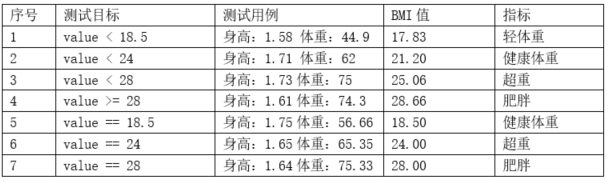



## 小试身手

1.编写程序：输入半径r(浮点数)，输出以r为半径的圆的面积。使用math库中的数学函数math.pi，如果输入数据为负数，输出"ERROR"  
运行示例如下：  
示例一：
r=3.5
38.48451000647496
示例二：  
r=-2.9
ERROR

In [ ]:
# math.pi的导入方法是在程序开头加上下面一行代码，程序中用 math.pi 表示 pi
import math


2.改错题，程序实现的功能是按照下面的分段函数，对输入的整数x，输出对应的y值。对于超出范围的整数x，输出“ERROR”。
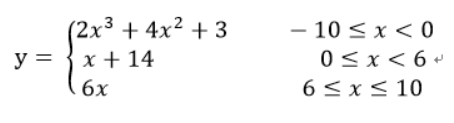
下面的程序有三处错误，请找出并修改，试程序能正常运行。  
测试用例：  
输入：12    输出：ERROR  
输入： 6    输出：36  
输入：-1    输出：5  
输入： 5    输出：19  

In [ ]:
x = input()
if x > 10 or x < -10:
    print("ERROR")
else:
    if x < 0:
        y = 2 * x * x * x + 4 * x * x + 3
    elif x < 6:
        y = x + 14
    else  x <= 10:
        y = 6 * x      
print(y)
